<div hidden>
    $\newcommand{\q}{\left}$
    $\newcommand{\w}{\right}$
    $\newcommand{\m}{\middle}$
    $\newcommand{\e}{\boldsymbol}$
    $\newcommand{\cb}{\mspace{3mu}\m\vert\mspace{3mu}}$
</div>

<center>
    Sveučilište u Zagrebu<br>
    Fakultet elektrotehnike i računarstva<br>
    <a href="http://www.fer.unizg.hr/predmet/map">Multivarijatna analiza podataka</a><br>
    Ak. god. 2023./24.
</center>

<h1>
    Laboratorijska vježba 3: <br> Diskriminantna analiza, metode grupiranja i udaljenosti, analiza korespondencije
</h1>

**Rok za predaju: 6. lipnja 2024. (četvrtak) u 23:59h**

---

## Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa  &mdash; ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

---

## Podatkovni skup

U ovoj laboratorijskoj vježbi analizirat ćemo skup podataka s oko 1500 najpoznatijih klasičnih skladbi prema glasovima korisnika stranice [classicalmusiconly.com](https://classicalmusiconly.com/).
Opis varijabli dan je u tablici u nastavku:

<table>
    <thead>
        <tr>
            <th>Naziv stupca</th>
            <th>Opis</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>title</code></td>
            <td>naziv skladbe</td>
        </tr>
        <tr>
            <td><code>category</code></td>
            <td>kategorija kojoj skladba pripada<br>(sonata, simfonija, itd.)</td>
        </tr>
        <tr>
            <td><code>composer</code></td>
            <td>ime skladatelja</td>
        </tr>
        <tr>
            <td><code>year</code></td>
            <td>godina kada je skladba napisana</td>
        <tr>
            <td><code>epoch</code></td>
            <td>stilsko razdoblje</td>
        </tr>
        <tr>
            <td><code>country</code></td>
            <td>država rođenja skladatelja</td>
        <tr>
            <td><code>stars</code></td>
            <td>broj glasova <br> (koliko korisnika je označilo skladbu kao favorit))</td>
        </tr>
    </tbody>
</table>

---

Učitajte datoteku `classical_data.csv` i proučite podatke.
Varijable `category`, `composer`, `epoch` i `country` treba tretirati kao da se radi o kategorijskim varijablama.
Ispišite nekoliko redaka iz tablice.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

classical_data = pd.read_csv('classical_data.csv')

classical_data.head()

,Unnamed: 0,title,category,composer,year,epoch,country,stars
0,1,The Four Seasons (Le Quattro Stagioni),Violin Concerto,Antonio Vivaldi,1723,Baroque,Italy,2515
1,2,"Requiem in D Minor, K. 626",Mass / Requiem,Wolfgang Amadeus Mozart,1791,Classical,Austria,2122
2,3,"Symphony No. 9 in D Minor, Op. 125",Symphony,Ludwig van Beethoven,1824,Early Romantic,Germany,2084
3,4,Nocturnes,Piano Sonata,Frédéric Chopin,1846,Romantic,Poland,1999
4,5,"Swan Lake, Op. 20",Ballet,Pyotr Ilyich Tchaikovsky,1876,Romantic,Russia,1335


---

## 1. Grupiranje

U ovom zadatku ćemo grupirati kategorije skladbi na temelju njihove sličnosti.

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj.

In [55]:
cont_table = pd.crosstab(classical_data['composer'], 
                            classical_data['category'],  
                               margins = False) 

cont_table

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,4,0,0,0,0,1
Alban Berg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0


---

Prije nego što nastavimo s grupiranjem, željeli bismo smanjiti broj kategorija koje ćemo uzeti u obzir. <br>
<b>b)</b> Grafički prikažite ukupan broj skladbi po pojedinoj kategoriji, <i>sortirano</i> uzlazno.
Zatim proizvoljno odredite prag, te izbacite sve kategorije (stupce kontingencijske tablice) koje po Vašem kriteriju sadrže premalo skladbi.
Ako nakon izbacivanja u tablici preostanu skladatelji koji imaju ukupno 0 skladbi, izbacite i takve retke. <br>
<b>Prikažite dobivenu tablicu i graf temeljem kojega ste odredili prag.</b>

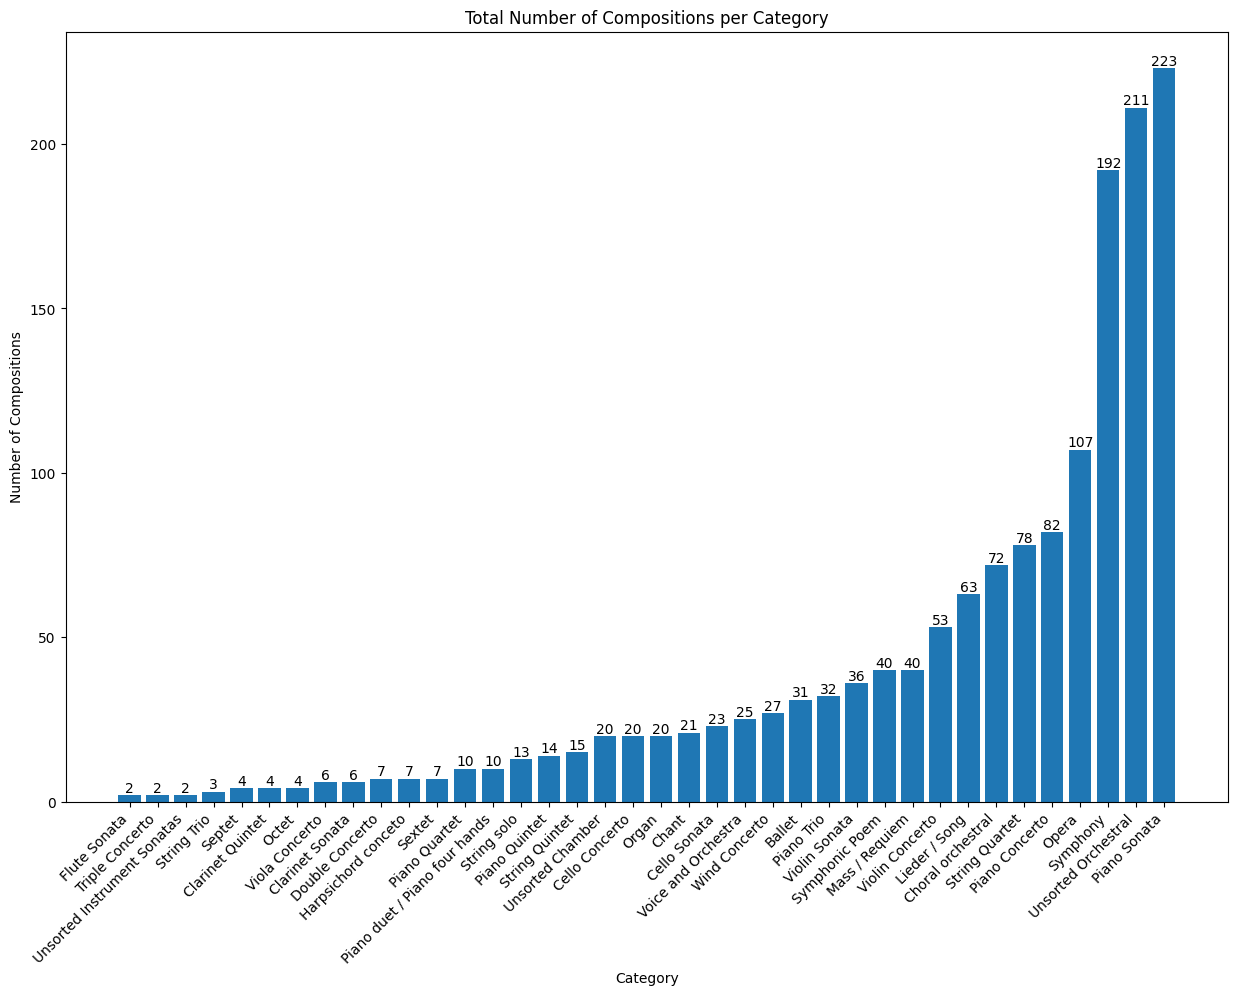

In [56]:

category_counts = classical_data.groupby('category').size().sort_values()

plt.figure(figsize=(15,10))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Compositions')
plt.title('Total Number of Compositions per Category')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(category_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()



In [57]:
#  ========= izbacivanje =========
# odabrao sam prag 15

cont_table = cont_table.loc[:, category_counts >= 16]
cont_table

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Lieder / Song,Mass / Requiem,Opera,Organ,Piano Concerto,...,Piano Trio,String Quartet,Symphonic Poem,Symphony,Unsorted Chamber,Unsorted Orchestral,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,0,0,0,1
Alban Berg,0,0,0,0,0,1,0,2,0,0,...,0,1,0,0,0,2,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,1,0,0,...,0,2,1,3,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,1,...,0,0,0,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,1,...,0,0,0,2,0,3,0,0,0,0


---

<b>c)</b> Provedite hijerarhijsko aglomerativno grupiranje (engl. <i>hierarchical agglomerative clustering</i>) nad <b>kategorijama.</b> Kao mjeru udaljenosti među kategorijama koristite <b>kosinusnu udaljenost</b> među stupcima kontingencijske tablice koju ste prethodno izračunali. Isprobajte različite metode za <b>spajanje grupa</b> (engl. <i>linkage</i>), te:
<ol>
    <li><b>nacrtajte dendrogram</b> za dobiveno grupiranje (vidi <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">poveznicu</a> za pomoć),</li>
    <li>prema dendrogramu <b>odredite broj grupa.</b></li>
</ol>
<b>Odaberite jednu metodu povezivanja</b> koja Vam daje rezultate koje najlakše možete interpretirati.
U obzir uzmite balansiranost veličina klastera.
<b>Prikažite dendrogram</b> i <b>ispišite nazive kategorija</b> u pojedinoj grupi u konačnom rezultatu grupiranja.

Cosine Distance Matrix:
 [[0.         0.87664866 0.96874618 0.95507351 0.92360309 0.97840423
  0.89830143 0.87640537 1.         0.77145647 0.92918249 0.92587507
  0.919303   0.90509275 0.82884548 0.96505717 0.71725741 0.77276074
  0.90268991 0.94964203 0.9515818 ]
 [0.87664866 0.         0.88305893 0.97198341 0.92853724 0.90909555
  0.9048697  0.93621396 1.         0.76977227 0.85192582 0.7226499
  0.75467331 0.9112224  0.47321807 0.90194193 0.73208371 0.69081765
  0.81794949 0.90578886 0.8867723 ]
 [0.96874618 0.88305893 0.         0.87222469 0.91172991 0.64683236
  0.78306954 0.96363636 0.95195    0.64166667 0.44315542 0.40268089
  0.43339688 0.95951118 0.67809704 0.9254644  0.67625235 0.75029683
  0.63098752 0.78516554 0.94836022]
 [0.95507351 0.97198341 0.87222469 0.         0.98047911 0.94113986
  0.46295683 0.98257609 0.98848824 0.87222469 0.92052283 0.84847712
  0.93814104 0.92239793 0.87961585 1.         0.82986171 0.94369547
  0.91159246 0.88562275 1.        ]
 [0.92360309 0.9

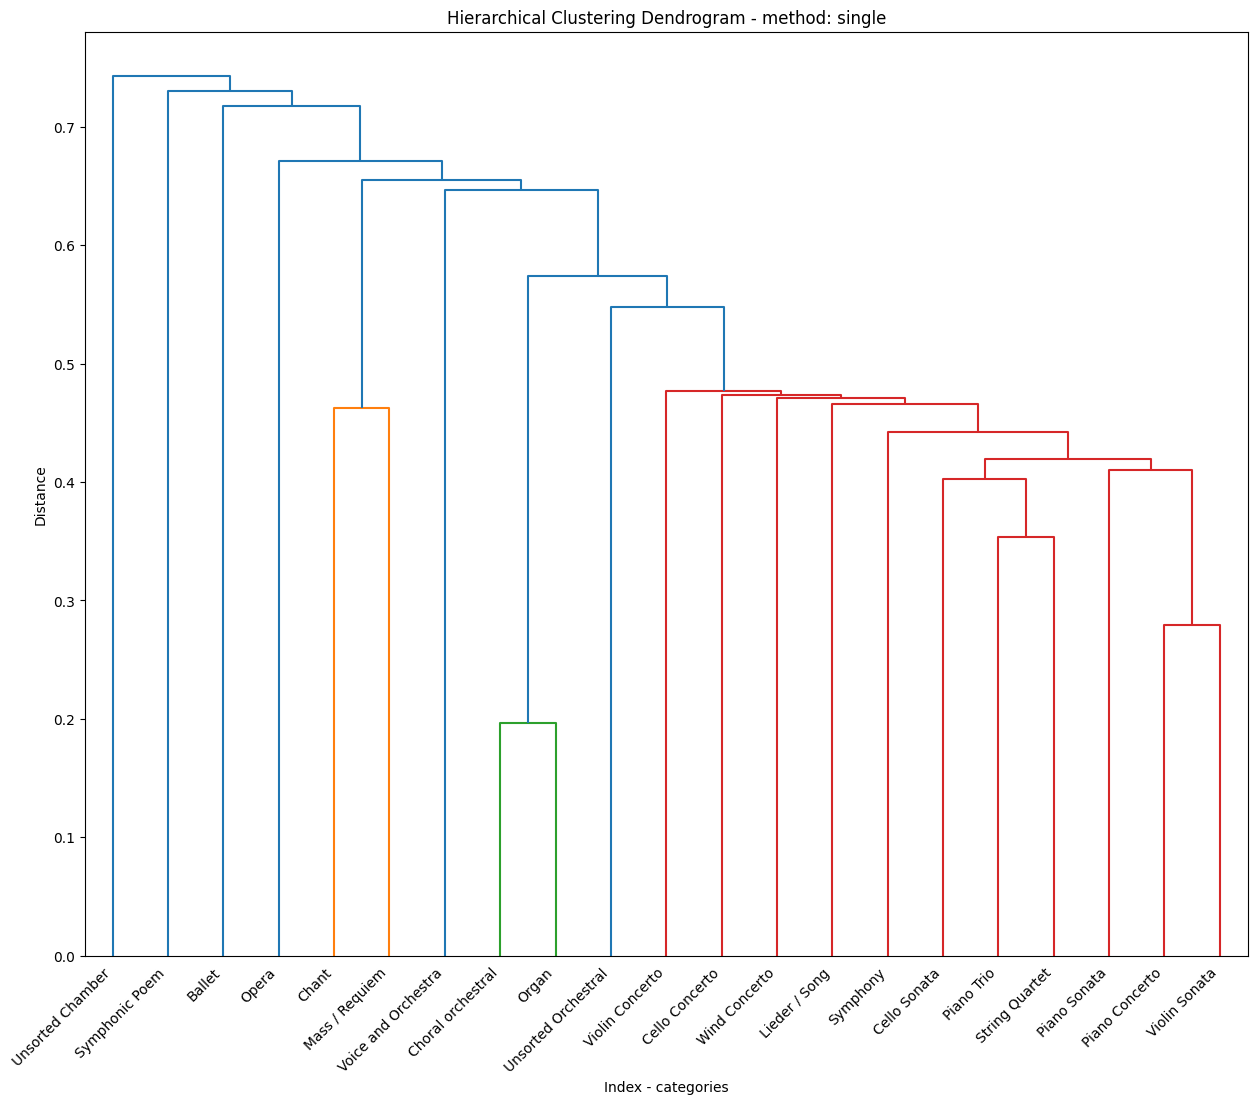

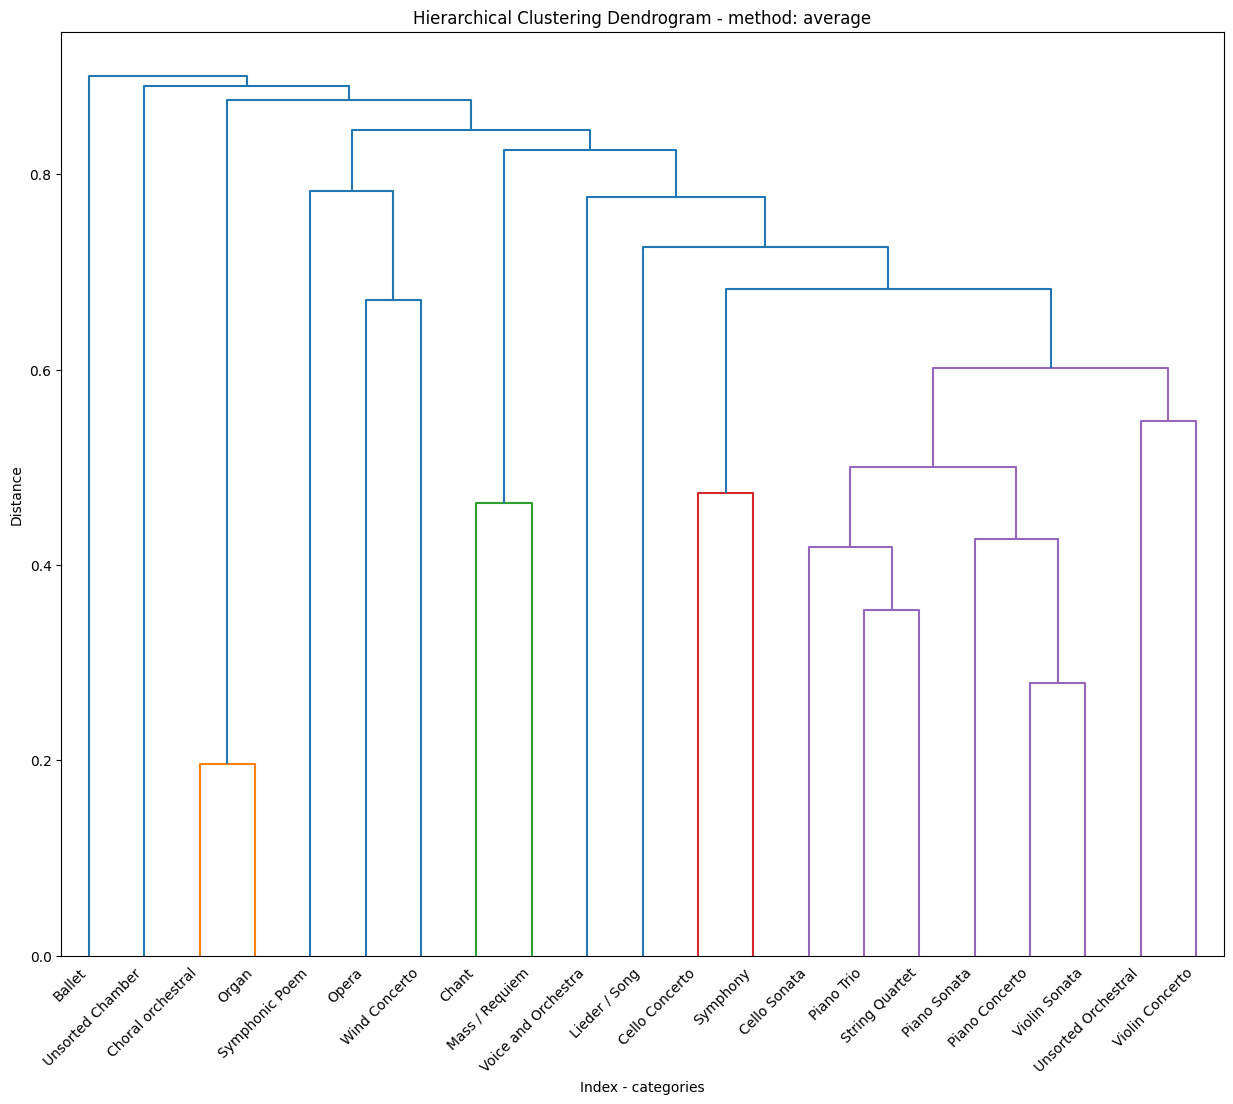

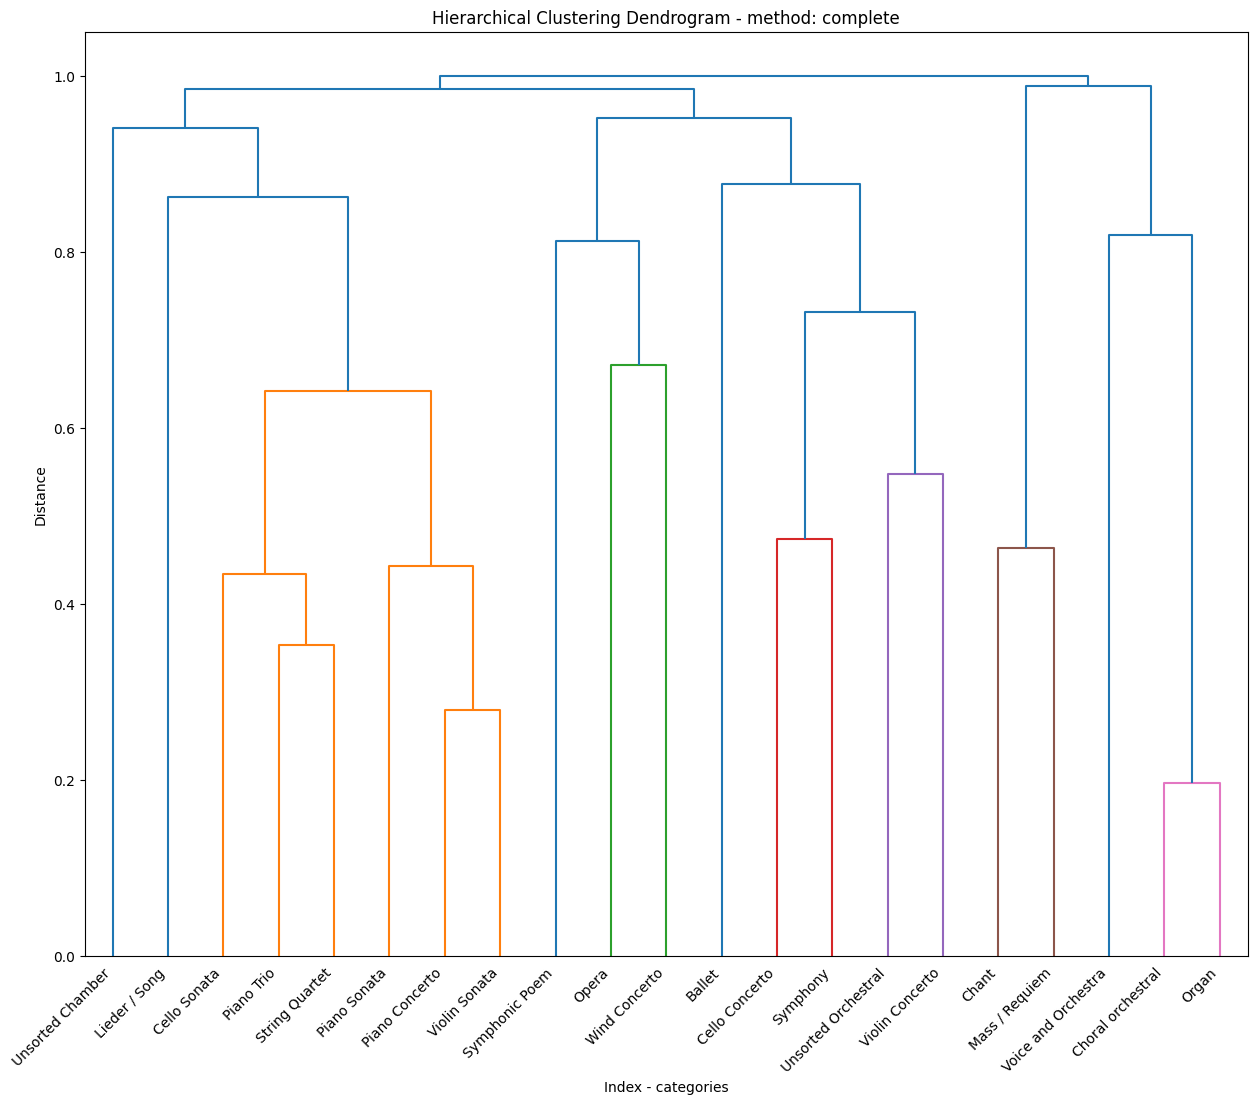

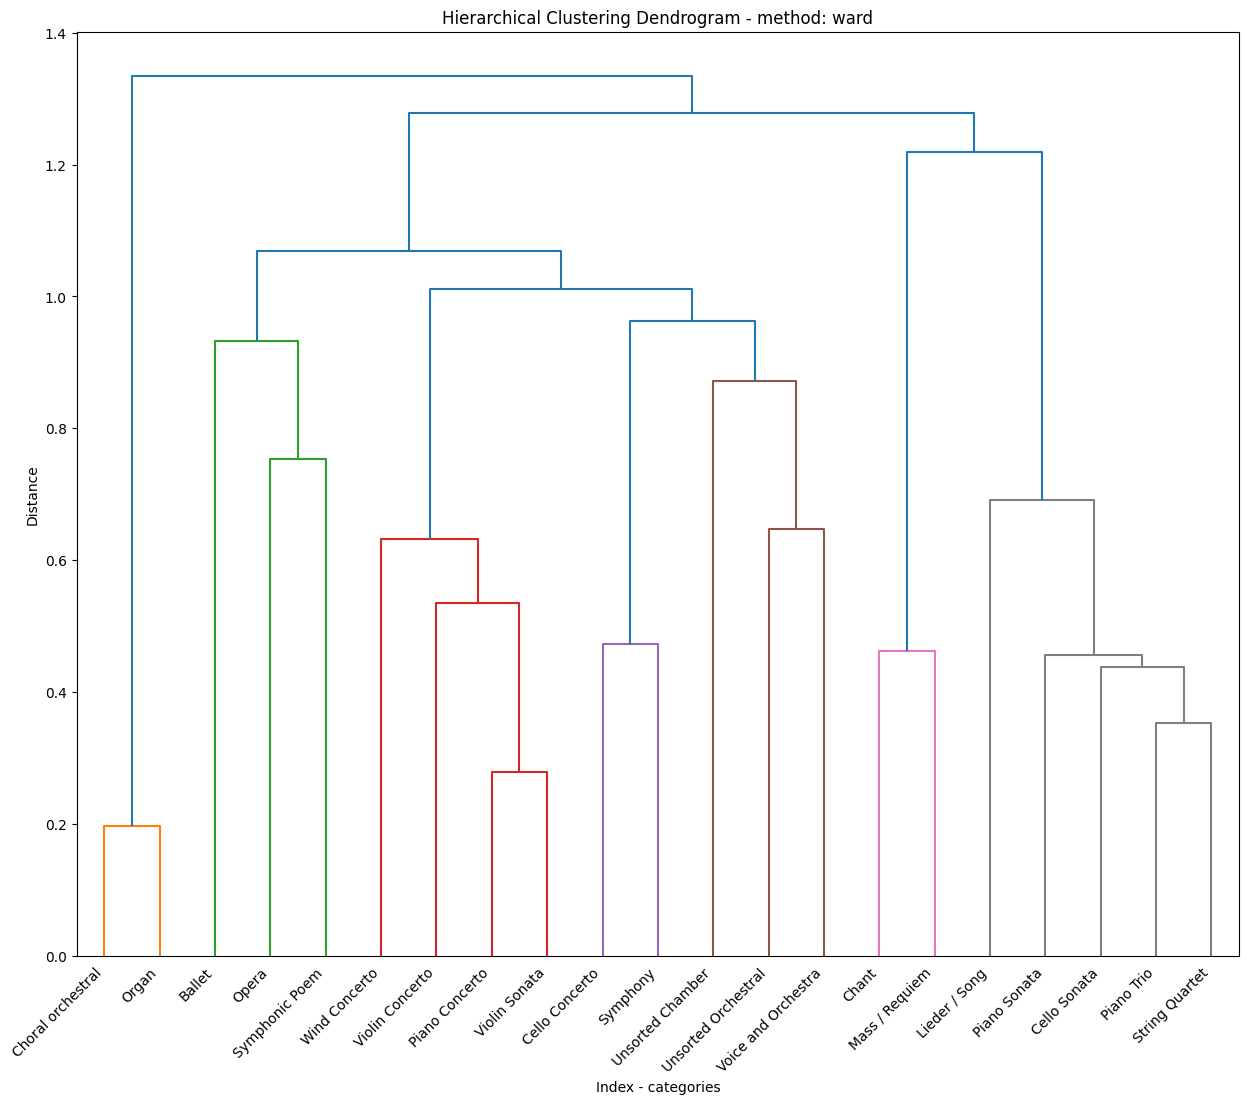

In [64]:
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

#df_normalized = pd.DataFrame(normalize(cont_table.T, axis=1), columns=cont_table.T.columns)
#print("Normalized DataFrame:\n", df_normalized)
# Prvo sam standardizirao ali sam onda vidio da je to u 2. zadatku pa pretpostavljam da to onda ovdje ne radim

cosine_distance_matrix = cosine_distances(cont_table.T)
print("Cosine Distance Matrix:\n", cosine_distance_matrix)

methods = ["single", "average", "complete", "ward"]

for m in methods :

    condensed_matrix = squareform(cosine_distance_matrix)
    Z = linkage(condensed_matrix, method=m) 

    # Plot the dendrogram
    plt.figure(figsize=(15, 12))
    dendrogram(Z, labels=cont_table.T.index.tolist())
    plt.title('Hierarchical Clustering Dendrogram - method: {}'.format(m))
    plt.xlabel('Index - categories')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Distance')
    plt.show()



---

## 2. Linearna diskriminantna analiza

U ovom zadatku želimo vizualizirati klasifikaciju skladatelja s obzirom na to kojem stilskom razdoblju pripadaju, koristeći izvedene značajke temeljene na kategorijama skladbi koje su pisali.

---

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj, kao i u <b>1. a)</b>. Zatim, standardizirajte retke kontingencijske tablice na način da od svakog retka oduzmete njegovu srednju vrijednost, te ga podijelite s njegovom standardnom devijacijom.
<b>Prikažite ovako standardiziranu tablicu</b> te se uvjerite da su srednje vrijednosti svih redaka jednake 0 i njihove devijacije jednake 1.

In [87]:
from sklearn.preprocessing import StandardScaler

cont_table2 = pd.crosstab(classical_data['composer'], 
                            classical_data['category'],  
                               margins = False) 

#cont_table2

row_means = np.mean(cont_table2, axis=1)
row_variances = np.var(cont_table2, axis=1)

cont_table2 = cont_table2 - np.array(row_means)[:, np.newaxis]

row_variances = np.var(cont_table2, axis=1)

cont_normalized = cont_table2 / np.sqrt(np.array(row_variances))[:, np.newaxis]


row_means = np.mean(cont_normalized, axis=1)
row_variances = np.var(cont_normalized, axis=1)

for i in range(len(row_means)):
   print(f"Row {i+1}: Mean = {row_means[i]:.3f}, Variance = {row_variances[i]:.3f}")


cont_normalized

Row 1: Mean = 0.000, Variance = 1.000
Row 2: Mean = 0.000, Variance = 1.000
Row 3: Mean = 0.000, Variance = 1.000
Row 4: Mean = 0.000, Variance = 1.000
Row 5: Mean = 0.000, Variance = 1.000
Row 6: Mean = 0.000, Variance = 1.000
Row 7: Mean = -0.000, Variance = 1.000
Row 8: Mean = 0.000, Variance = 1.000
Row 9: Mean = 0.000, Variance = 1.000
Row 10: Mean = 0.000, Variance = 1.000
Row 11: Mean = -0.000, Variance = 1.000
Row 12: Mean = 0.000, Variance = 1.000
Row 13: Mean = 0.000, Variance = 1.000
Row 14: Mean = 0.000, Variance = 1.000
Row 15: Mean = -0.000, Variance = 1.000
Row 16: Mean = -0.000, Variance = 1.000
Row 17: Mean = -0.000, Variance = 1.000
Row 18: Mean = 0.000, Variance = 1.000
Row 19: Mean = 0.000, Variance = 1.000
Row 20: Mean = 0.000, Variance = 1.000
Row 21: Mean = 0.000, Variance = 1.000
Row 22: Mean = -0.000, Variance = 1.000
Row 23: Mean = 0.000, Variance = 1.000
Row 24: Mean = 0.000, Variance = 1.000
Row 25: Mean = 0.000, Variance = 1.000
Row 26: Mean = -0.000, Varia

/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_23667/3051439453.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Row {i+1}: Mean = {row_means[i]:.3f}, Variance = {row_variances[i]:.3f}")


category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2.447374,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,...,1.079724,-0.287926,-0.287926,-0.287926,5.182673,-0.287926,-0.287926,-0.287926,-0.287926,1.079724
Alban Berg,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,...,-0.404061,-0.404061,-0.404061,-0.404061,3.434519,-0.404061,1.515229,-0.404061,-0.404061,-0.404061
Alessandro Scarlatti,-0.209657,-0.209657,-0.209657,-0.209657,5.765567,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,...,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657
Alexander Borodin,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,...,4.687755,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676
Alexander Glazunov,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,...,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,1.613796,-0.364405,-0.364405,1.613796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,...,-0.292770,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
William Walton,2.915476,2.915476,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,2.915476,2.915476,-0.342997,-0.342997,-0.342997
Witold Lutosławski,-0.342997,-0.342997,1.286239,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,2.915476,-0.342997,-0.342997,-0.342997,4.544713,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997


---

<b>b)</b> Provedite postupak višeklasne <b>linearne diskriminantne analize</b>.
Klasificirajte skladatelje prema stilskom razdoblju kojem pripadaju (jedan skladatelj pripada samo jednom razdoblju), koristeći stupce prethodno standardizirane kontingencijske tablice iz 2. b) kao značajke.<br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Koje klase se najbolje razdvajaju od ostalih na dobivenom prikazu?

In [131]:
from sklearn.preprocessing import LabelEncoder

df_for_y= classical_data[['composer', 'epoch']]

df_for_y

classical_data_unique_for_y = df_for_y.drop_duplicates(subset='composer', keep='first')

classical_data_unique_for_y.sort_values(by='composer', inplace=True)

encoder = LabelEncoder()

encoder.fit(classical_data_unique_for_y['epoch'])

classical_data_unique_for_y['encoded_epoch'] = encoder.transform(classical_data_unique_for_y['epoch'])
print(classical_data_unique_for_y.shape)

classical_data_unique_for_y.head()

(126, 3)


/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_23667/214159879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classical_data_unique_for_y.sort_values(by='composer', inplace=True)
/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_23667/214159879.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classical_data_unique_for_y['encoded_epoch'] = encoder.transform(classical_data_unique_for_y['epoch'])


,composer,epoch,encoded_epoch
152,Aaron Copland,20th Century,0
171,Alban Berg,20th Century,0
797,Alessandro Scarlatti,Baroque,1
134,Alexander Borodin,Romantic,7
649,Alexander Glazunov,Late Romantic,4


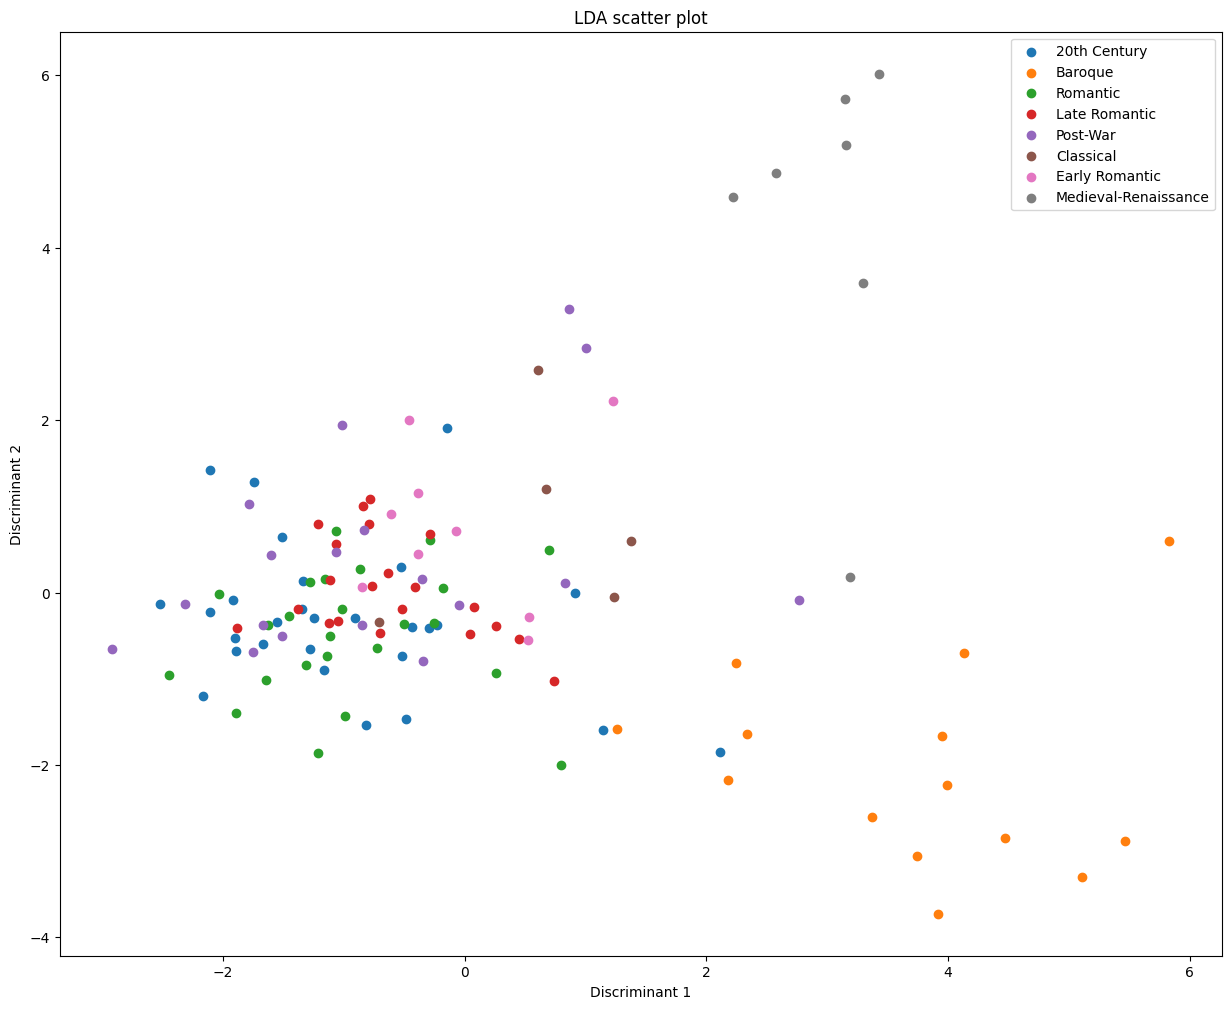

Discriminant 1 (explained variance ratio): 0.361
Discriminant 2 (explained variance ratio): 0.232
Discriminant 3 (explained variance ratio): 0.148
Discriminant 4 (explained variance ratio): 0.096
Discriminant 5 (explained variance ratio): 0.066
Discriminant 6 (explained variance ratio): 0.064
Discriminant 7 (explained variance ratio): 0.034


In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis() #np.count_nonzero(cont_normalized.columns))

y = classical_data_unique_for_y['encoded_epoch']

X_lda = lda.fit_transform(cont_normalized, y)

unique_labels = classical_data_unique_for_y['encoded_epoch'].unique()
label_names = classical_data_unique_for_y.drop_duplicates(subset='encoded_epoch').set_index('encoded_epoch')['epoch']

plt.figure(figsize=(15, 12))
for label in unique_labels:
    plt.scatter(
        X_lda[y == label, 0], 
        X_lda[y == label, 1], 
        label=label_names[label]
    )

plt.legend()
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('LDA scatter plot')
plt.show()

explained_variance_ratio = lda.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Discriminant {i+1} (explained variance ratio): {ratio:.3f}')

# Jedna točka = jedan skladatelj, isto razdoblje ista klasa

---

<b>c)</b> Ponovite postupak višeklasne <b>linearne diskriminantne analize</b>, ovaj put nad reduciranim skupom podataka koji sadrži samo sljedeća stilska razdoblja:
`
["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
`. <br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Komentirajte kvalitetu dobivenog prikaza u odnosu na prethodni podzadatak.

In [158]:
selected_epochs = ["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
classical_data_small_epoch = classical_data[classical_data['epoch'].isin(selected_epochs)]


df_for_y_small= classical_data_small_epoch[['composer', 'epoch']]

df_for_y_small

classical_data_unique_for_y_small = df_for_y_small.drop_duplicates(subset='composer', keep='first')

classical_data_unique_for_y_small.sort_values(by='composer', inplace=True)

encoder2 = LabelEncoder()

encoder2.fit(classical_data_unique_for_y_small['epoch'])

classical_data_unique_for_y_small['encoded_epoch'] = encoder.transform(classical_data_unique_for_y_small['epoch'])
print(classical_data_unique_for_y_small.shape)

classical_data_unique_for_y_small.head()


(73, 3)


/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_23667/2200014301.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classical_data_unique_for_y_small.sort_values(by='composer', inplace=True)
/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_23667/2200014301.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classical_data_unique_for_y_small['encoded_epoch'] = encoder.transform(classical_data_unique_for_y_small['epoch'])


,composer,epoch,encoded_epoch
797,Alessandro Scarlatti,Baroque,1
134,Alexander Borodin,Romantic,7
649,Alexander Glazunov,Late Romantic,4
227,Alexander Scriabin,Late Romantic,4
135,Anton Bruckner,Romantic,7


In [145]:
composers = classical_data_unique_for_y_small['composer'].tolist()

filtered_cont = cont_normalized[cont_normalized.index.isin(composers)]

reduced_cont_table = pd.DataFrame(filtered_cont)

print(reduced_cont_table)

category                   Ballet  Cello Concerto  Cello Sonata     Chant  \
composer                                                                    
Alessandro Scarlatti    -0.209657       -0.209657     -0.209657 -0.209657   
Alexander Borodin       -0.306676       -0.306676     -0.306676 -0.306676   
Alexander Glazunov       3.591997       -0.364405     -0.364405 -0.364405   
Alexander Scriabin      -0.243709       -0.243709     -0.243709 -0.243709   
Anton Bruckner          -0.249523       -0.249523     -0.249523  0.427754   
...                           ...             ...           ...       ...   
Richard Strauss         -0.348791       -0.348791     -0.348791 -0.348791   
Richard Wagner          -0.217357       -0.217357     -0.217357 -0.217357   
Robert Schumann         -0.377292       -0.027607     -0.027607 -0.377292   
Sergei Rachmaninoff     -0.469696       -0.469696      0.244242  0.958180   
Wolfgang Amadeus Mozart -0.670721       -0.670721     -0.670721 -0.670721   

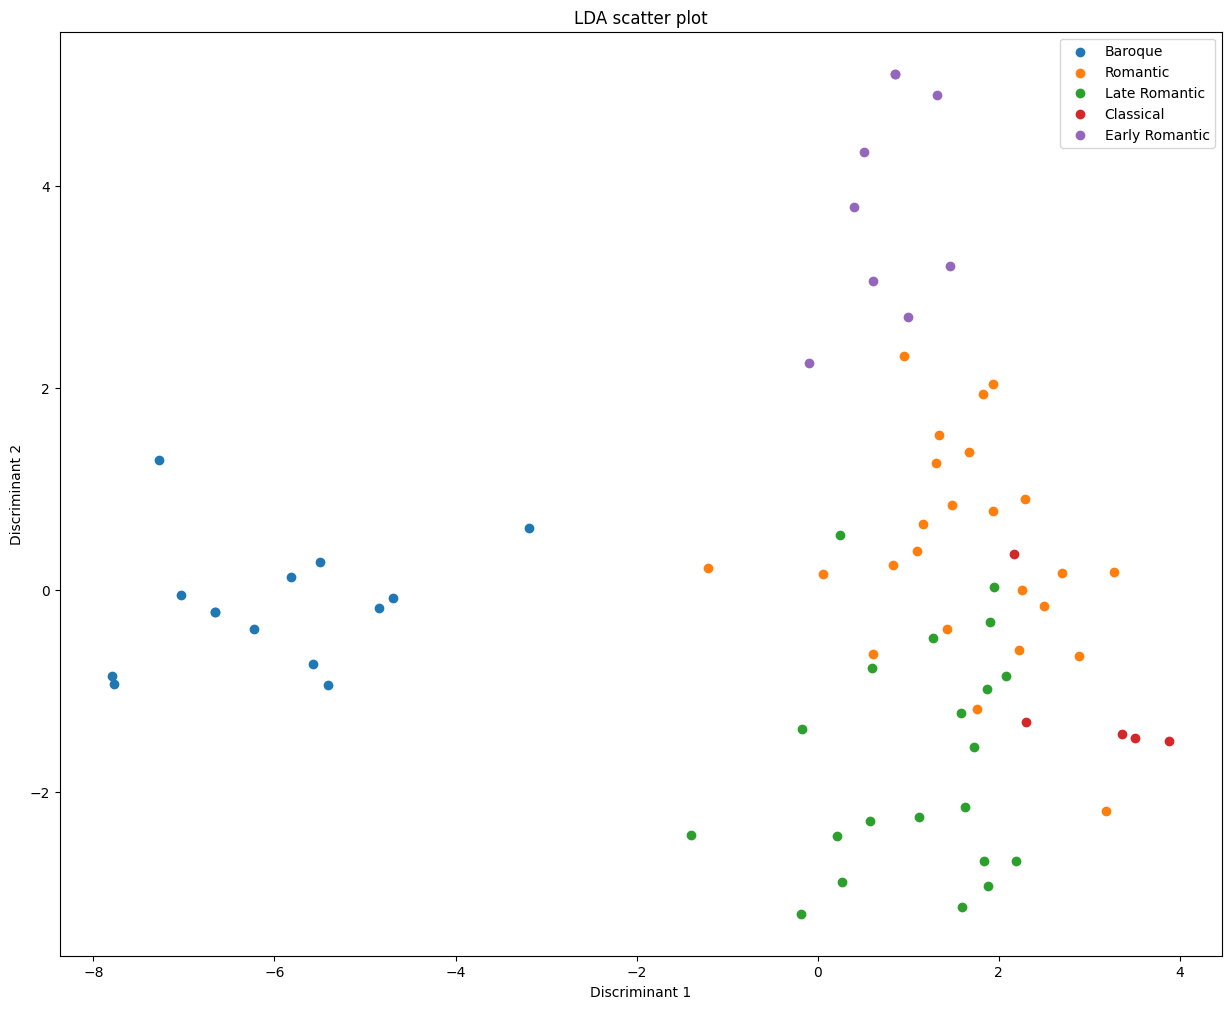

Discriminant 1 (explained variance ratio): 0.612
Discriminant 2 (explained variance ratio): 0.191
Discriminant 3 (explained variance ratio): 0.115
Discriminant 4 (explained variance ratio): 0.082


In [160]:
X = reduced_cont_table
y2 = classical_data_unique_for_y_small['encoded_epoch']

X_lda2 = lda.fit_transform(X, y2)

unique_labels2 = classical_data_unique_for_y_small['encoded_epoch'].unique()
label_names2 = classical_data_unique_for_y_small.drop_duplicates(subset='encoded_epoch').set_index('encoded_epoch')['epoch']

plt.figure(figsize=(15, 12))
for label in unique_labels2:
    plt.scatter(
        X_lda2[y2 == label, 0], 
        X_lda2[y2 == label, 1], 
        label=label_names2[label]
    )

plt.legend()
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('LDA scatter plot')
plt.show()

explained_variance_ratio = lda.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Discriminant {i+1} (explained variance ratio): {ratio:.3f}')

# Jedna točka = jedan skladatelj, isto razdoblje ista klasa

## 3. Višedimenzionalno skaliranje

U ovom zadatku želimo vizualizirati sličnosti između pojedinih stilskih razdoblja koristeći metričko i nemetričko skaliranje.

---

<b>a)</b>
**Izračunajte i prikažite** kontingencijsku tablicu za varijable `category` i `epoch` (stilsko razdoblje).
Neka retci sadrže kategorije, a stupci stilska razdoblja.

In [124]:
cont_table3 = pd.crosstab(classical_data['category'], 
                            classical_data['epoch'],  
                               margins = False) 

cont_table3

epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
category,,,,,,,,
Ballet,19,2,0,0,6,0,0,4
Cello Concerto,6,0,5,0,2,0,2,5
Cello Sonata,3,0,0,5,6,0,2,7
Chant,1,0,0,0,2,10,4,4
Choral orchestral,7,42,6,2,5,2,2,6
Clarinet Quintet,0,0,1,1,1,0,0,1
Clarinet Sonata,1,0,0,0,2,0,0,3
Double Concerto,1,1,2,0,0,0,0,3
Flute Sonata,1,1,0,0,0,0,0,0


---

<b> b)</b> **Izračunajte** udaljenosti među stilskim razdobljima koristeći *totalnu varijacijsku udaljenost*. 
Neka je $C$ kontingencijska matrica dimenzija $N \times M$, te neka su kategorije skladbi raspoređene po retcima, a stilska razdoblja po stupcima. Totalna varijacijska daljenost između dva stilska razdboblja $i$ i $j$ računa se kao
$$
\delta_{i,j} = \frac{1}{2} \sum_{k=1}^N \left\lvert \frac{C_{k,i}}{S_i} - \frac{C_{k,j}}{S_j} \right\rvert,
$$
gdje je $S_i = \sum_{k=1}^N C_{k,i}$. **Izračunajte i prikažite** matricu udaljenosti $\Delta$ čiji elementi su $\Delta_{i, j} = \delta_{i, j}$. <br>
Provjerite koji parovi kategorija su najsličniji, a koji najrazličitiji.

In [181]:
import itertools

epochs = np.unique(classical_data['epoch'])

epoch_combinations = list(itertools.combinations(epochs, 2))

delta_matrix = pd.DataFrame(index=epochs, columns=epochs)
S = cont_table3.sum()

for ec in epoch_combinations :
    #print(ec)
    delta_mini = 0.5 * np.abs(cont_table3[ec[0]]/S[ec[0]] - cont_table3[ec[1]]/S[ec[1]])

    #print(np.sum(delta_mini))
    delta_matrix.loc[ec[0],ec[1]] = np.sum(delta_mini)
    delta_matrix.loc[ec[1],ec[0]] = np.sum(delta_mini)


# dijagonale : element je sam sebi udaljen 0

for ec in epoch_combinations :

    delta_matrix.loc[ec[0],ec[0]] = 0
    delta_matrix.loc[ec[1],ec[1]] = 0

delta_matrix

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
20th Century,0,0.585714,0.420856,0.454386,0.300816,0.770463,0.261111,0.301483
Baroque,0.585714,0,0.651381,0.63188,0.592972,0.751987,0.616013,0.568025
Classical,0.420856,0.651381,0,0.41574,0.442548,0.800908,0.516751,0.395069
Early Romantic,0.454386,0.63188,0.41574,0,0.357317,0.737632,0.481725,0.308647
Late Romantic,0.300816,0.592972,0.442548,0.357317,0,0.769916,0.377731,0.216492
Medieval-Renaissance,0.770463,0.751987,0.800908,0.737632,0.769916,0,0.731419,0.807192
Post-War,0.261111,0.616013,0.516751,0.481725,0.377731,0.731419,0,0.390255
Romantic,0.301483,0.568025,0.395069,0.308647,0.216492,0.807192,0.390255,0


---

<b>c)</b>
Provedite postupak klasičnog, <b>metričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu udaljenosti.</b><br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

/Users/franostroski/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


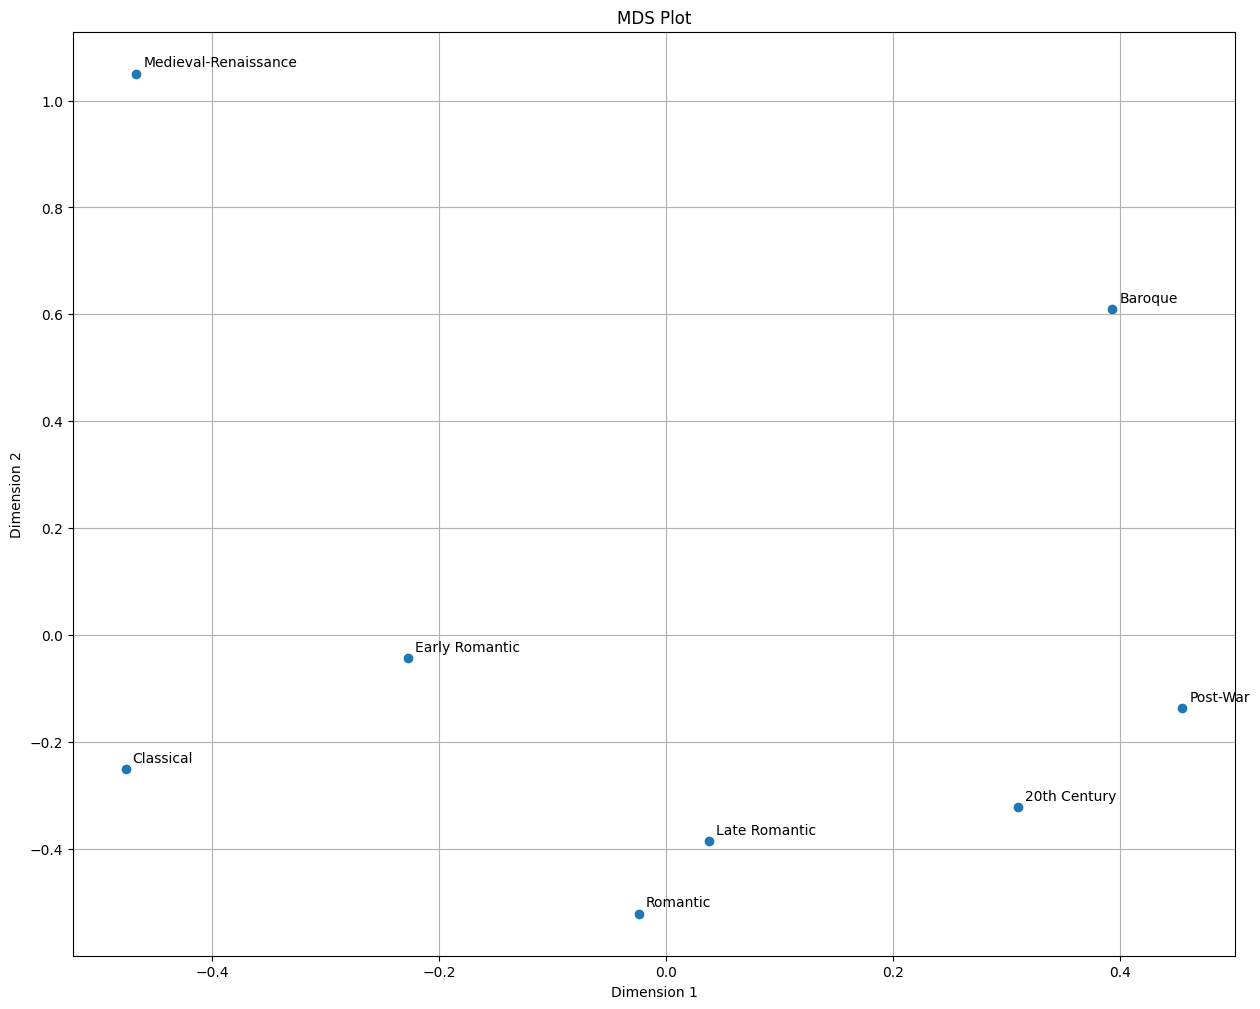

Stress: 0.5876020678773961


In [195]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)

mds_coords = mds.fit_transform(delta_matrix)
mds_df = pd.DataFrame(mds_coords, index=delta_matrix.index, columns=['Dimension 1', 'Dimension 2'])

plt.figure(figsize=(15, 12))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'])

# Annotate points
for label, x, y in zip(mds_df.index, mds_df['Dimension 1'], mds_df['Dimension 2']):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot')
plt.grid(True)
plt.show()

stress = mds.stress_

print(f'Stress: {stress}')


--- 

<b>d)</b> Neka je $\mathbf C$ kontingencijska tablica s početka ovog zadatka.
Neka je mjera sličnosti između dvaju stilskih razdoblja $i$ i $j$ definirana na način:
\begin{equation}
\mathit{sim}\left(i, j\right) = \sum_{k = 0}^N \frac{\min \left\{C_{k, i}, C_{k, j} \right\}}{\max \left\{C_{k, i}, C_{k, j}\right\}}
\end{equation}
<b>Izračunajte sličnosti</b> između svih parova stilskih razdoblja. Zatim, sami izvedite neku mjeru različitosti temeljem izračunate mjere sličnosti.
Konačno, <b>izračunajte matricu različitosti</b> koja sadrži različitosti svih parova stilskih razdoblja.<br>
Kako se rezultati razlikuju u odnosu na 3. b)?

In [194]:
epochs = np.unique(classical_data['epoch'])

#print(len(np.unique(classical_data['category'])))

epoch_combinations = list(itertools.combinations(epochs, 2))

sim_matrix = pd.DataFrame(index=epochs, columns=epochs)

for ec in epoch_combinations:
    #print(ec)
    epoch1, epoch2 = ec
    # Extract the relevant columns for the current combination of epochs
    col1 = cont_table3[epoch1]
    col2 = cont_table3[epoch2]

    # Calculate the min and max values for each row
    sim_mins = np.minimum(col1, col2)
    sim_maxs = np.maximum(col1, col2)
    
    # Calculate the ratio
    result = sim_mins / sim_maxs
    
    # Sum the results
    sim_sum = result.sum()
    
    # Update the similarity matrix
    sim_matrix.loc[epoch1, epoch2] = sim_sum
    sim_matrix.loc[epoch2, epoch1] = sim_sum

# Set diagonal values to 1 (self-similarity)
np.fill_diagonal(sim_matrix.values, 1* len(np.unique(classical_data['category'])))


# dijagonale : element je sam sebi udaljen 0


sim_matrix

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
20th Century,38,9.621821,11.823717,12.83122,13.586128,2.447254,13.99228,15.793201
Baroque,9.621821,38,4.693694,6.847619,5.658397,2.115402,6.201235,4.586382
Classical,11.823717,4.693694,38,11.961691,10.780894,2.602381,8.781366,10.425243
Early Romantic,12.83122,6.847619,11.961691,38,12.985162,3.510294,10.225855,12.115599
Late Romantic,13.586128,5.658397,10.780894,12.985162,38,2.383279,10.223074,15.000967
Medieval-Renaissance,2.447254,2.115402,2.602381,3.510294,2.383279,38,4.229932,2.404182
Post-War,13.99228,6.201235,8.781366,10.225855,10.223074,4.229932,38,9.657455
Romantic,15.793201,4.586382,10.425243,12.115599,15.000967,2.404182,9.657455,38


In [201]:
dif_matrix = (1 / sim_matrix) 

np.fill_diagonal(dif_matrix.values, 0)

dif_matrix

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
20th Century,0,0.10393,0.084576,0.077935,0.073604,0.408621,0.071468,0.063318
Baroque,0.10393,0,0.213052,0.146036,0.176728,0.472723,0.161258,0.218037
Classical,0.084576,0.213052,0,0.0836,0.092757,0.384263,0.113878,0.095921
Early Romantic,0.077935,0.146036,0.0836,0,0.077011,0.284876,0.097791,0.082538
Late Romantic,0.073604,0.176728,0.092757,0.077011,0,0.41959,0.097818,0.066662
Medieval-Renaissance,0.408621,0.472723,0.384263,0.284876,0.41959,0,0.23641,0.415942
Post-War,0.071468,0.161258,0.113878,0.097791,0.097818,0.23641,0,0.103547
Romantic,0.063318,0.218037,0.095921,0.082538,0.066662,0.415942,0.103547,0


---

<b>e)</b>
Provedite postupak <b>nemetričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu različitosti.</b> <br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

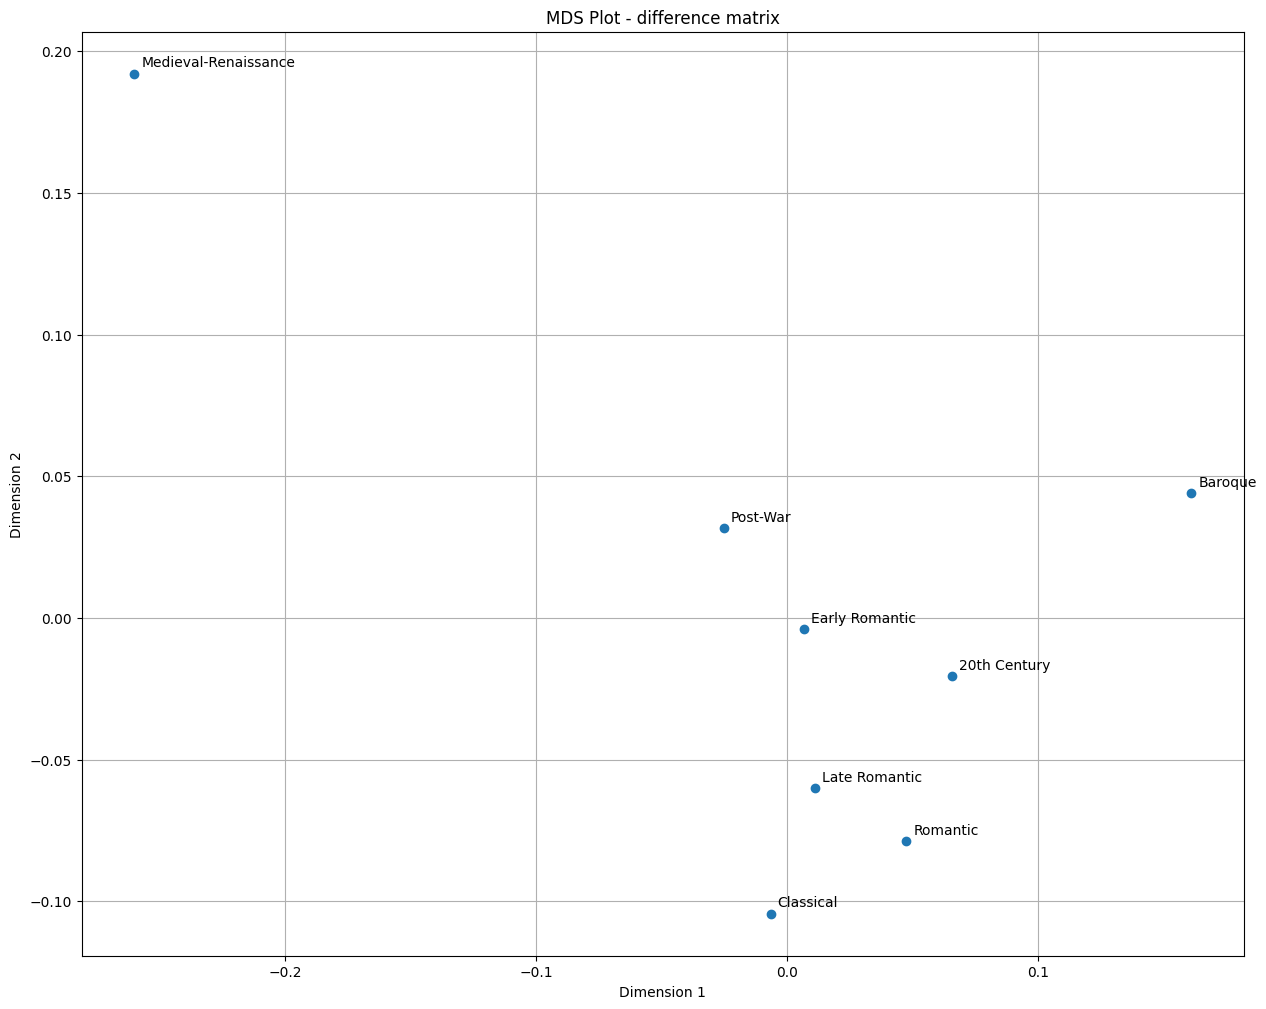

Stress: 0.02311023946177933


In [202]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

mds_coords = mds.fit_transform(dif_matrix)
mds_df = pd.DataFrame(mds_coords, index=delta_matrix.index, columns=['Dimension 1', 'Dimension 2'])

plt.figure(figsize=(15, 12))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'])

# Annotate points
for label, x, y in zip(mds_df.index, mds_df['Dimension 1'], mds_df['Dimension 2']):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot - difference matrix')
plt.grid(True)
plt.show()

stress = mds.stress_

print(f'Stress: {stress}')


---

## 4. Analiza korespondencije (opcionalno &mdash; vidi napomenu)

<b>Napomena: </b> Zbog nepredviđenih promjena u nastavnom planu, ove akademske godine ovaj zadatak neće se bodovati (ni u predanom izvještaju niti na usmenoj obrani). Zadatak je ipak ovdje ostavljen kao dodatni materijal, te preporučujemo da ga riješite za vježbu nakon što se predavanja iz dotičnog dijela gradiva održe.

<b>a) </b>
**Kreirajte** novi podskup podataka tako da sadrži samo skladbe **prvih 5&ndash;10 skladatelja** po nekom kriteriju &mdash; proizvoljno odaberite kriterij po kojemu ćete ih poredati (npr. ukupan broj skladbi, ukupan broj glasova po svim skladbama, prosječan broj glasova po svim skladbama, ili samo odaberite 5&ndash;10 skladatelja po vlastitom izboru).
Zatim **odredite** koje kategorije skladbi se najčešće pojavljuju u dobivenom podskupu, te unutar njega zadržite samo skladbe koje pripadaju otprlike **5&ndash;10 najčešćih kategorija**.

---

U nastavku vježbe koristite ovako generirani podskup podataka.

<b>b)</b>**Izračunajte i prikažite** kontingencijsku tablicu između skladatelja i kategorije skladbi koje su napisali.


---

<b>c)</b> **Prikažite** graf raspršenja analize korespondencije između varijabli `composer` i `category` koristeći prve dvije komponente. 
Jasno <b>označite</b> (bojom i oblikom markera, ili natpisima) kojeg skladatelja, odnosno kategoriju, predstavlja pojedina točka.
<b>Ispišite</b> udjele objašnjene varijance za sve komponente, te ukupnu inerciju.
Također, na grafu <b>označite ishodište</b> radi lakše interpretacije. <br>
Obratite pozornost na objašnjenu varijancu temeljem prve dvije komponente. Na temelju dobivenog grafa i kontingencijske tablice iz prethodnog zadatka pokušajte odgovoriti na sljedeća pitanja:

-   Koji skladatelji se najviše izdvajaju po pojedinoj kategoriji?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim skladateljima?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim kategorijama?
-   Koji skladatelji su pisali prosječan broj skladbi u svim kategorijama?

---

<b>d)</b> <b>Provedite analizu korespondencije</b> između varijabli `country` i `epoch`.
U obzir uzmite <b>reducirani skup podataka</b> koji sadrži samo sljedeće države: `["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]`.
<b>Prikažite graf</b> kao i u prethodnom podzadatku, te <b>ispišite</b> udjele objašnjene varijance i ukupnu inerciju.
Što možete zaključiti o odnosima država i stilskih razdoblja pomoću grafa?